In [2]:
import numpy as np

import pandas as pd

from gtda.time_series import SingleTakensEmbedding

from gtda.plotting import plot_point_cloud #可視化點雲

from persim import plot_diagrams #可視化持續圖

from ripser import ripser

import matplotlib.pyplot as plt

import itertools

import gudhi

In [3]:
def takens_embedding(signal, embedding_dimension):
    
    embedder = SingleTakensEmbedding(parameters_type="fixed", dimension=embedding_dimension)
    
    point_cloud = embedder.fit_transform(signal)
    
    return point_cloud

def persistent_homology(point_cloud):
    
    persistent_diagram = ripser(point_cloud)['dgms']

    return persistent_diagram 

第一條陣列： [-1.15099358  0.37569802 -0.60063869 -0.29169375 -0.60170661  1.85227818
 -0.01349722 -1.05771093  0.82254491 -1.22084365  0.2088636  -1.95967012
 -1.32818605  0.19686124  0.73846658  0.17136828 -0.11564828 -0.3011037
 -1.47852199 -0.71984421 -0.46063877  1.05712223  0.34361829 -1.76304016
  0.32408397 -0.38508228 -0.676922    0.61167629  1.03099952  0.93128012]


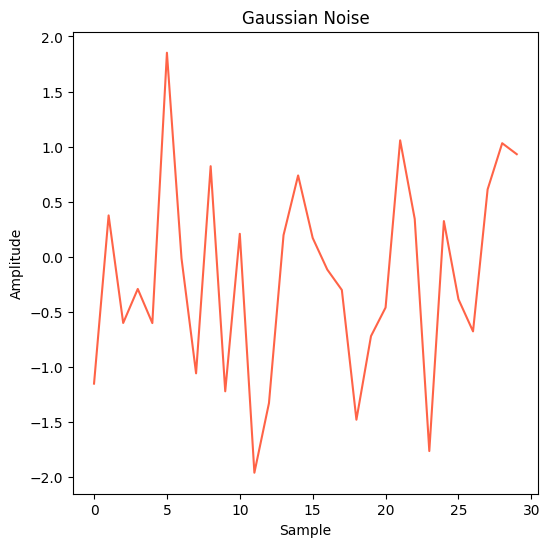

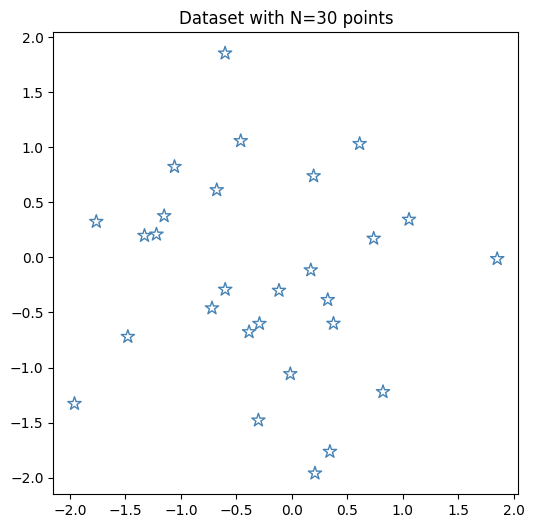

In [4]:
# Number of samples

N = 30

np.random.seed(42)

# Generate white noise (uniformly distributed)

white_noise = np.random.uniform(-1, 1, N)

# Generate Gaussian noise

mu = 0  # Mean

sigma = 1  # Standard deviation

gaussian_noise = np.random.normal(mu, sigma, N)

#a = white_noise

a = gaussian_noise

print('第一條陣列：', a)

#plt.subplot(2, 1, 2)

plt.figure(figsize=(6, 6))

plt.plot(gaussian_noise, color='tomato')

plt.title('Gaussian Noise')

plt.xlabel('Sample')

plt.ylabel('Amplitude')

plt.savefig('signal1.png')

plt.show()

aa = takens_embedding(a, embedding_dimension=3)

plt.figure(figsize=(6, 6))

plt.title('Dataset with N=%s points' % (N))  # Set the title of the plot

plt.scatter(aa[:, 0], aa[:, 1], color='steelblue', marker='*', facecolors='none', s = 100)

plt.savefig('pointcloud1.png')

plt.show()

aaa = persistent_homology(aa)

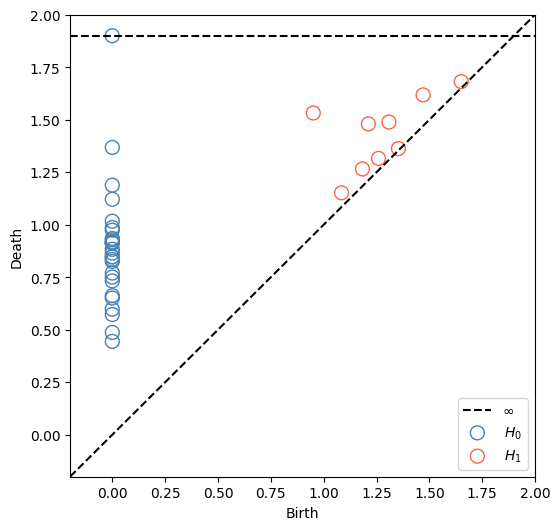

In [5]:
plt.figure(figsize=(6, 6))

x = np.linspace(-1, 3, 100)

plt.plot(x, x, 'k--', label=r'$\infty$')  # 對角虛線

# 第一個點雲的持續圖 -------------------------------------------------------------------------------------

data1_h0 = r'$ \, H_{0}$'

data1_h1 = r'$ \, H_{1}$'

marker1 = 'o'

size1 = 100

plt.scatter(aaa[0][:, 0], aaa[0][:, 1], color='steelblue', marker=marker1, facecolors='none', label= data1_h0, s = size1)

plt.scatter(0, 1.9, color='steelblue', marker=marker1, facecolors='none', s = size1)

plt.scatter(aaa[1][:, 0], aaa[1][:, 1], color='tomato', marker=marker1, facecolors='none', label= data1_h1, s = size1)

plt.axhline(y=1.9, color='k', linestyle='--')  # 水平虛線

plt.legend(loc='lower right')

plt.xlabel('Birth')

plt.ylabel('Death')

plt.xlim(-0.2, 2)

plt.ylim(-0.2, 2)

plt.savefig('pd1.png')

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/gudhi/persistence_graphical_tools.py:107: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


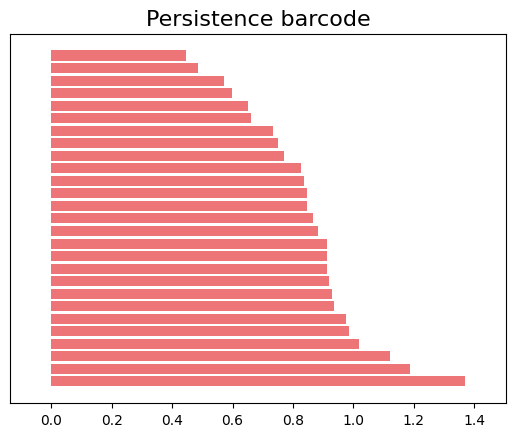

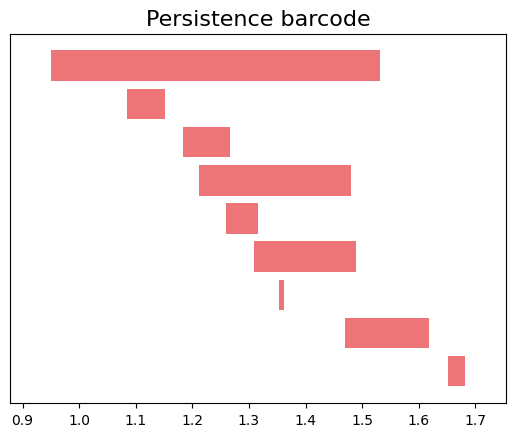

In [6]:
# 可視化 Persistence Barcode

h0 = aaa[0]

h0_barcodes = h0[~np.isinf(h0[:, 1])]

gudhi.plot_persistence_barcode(h0_barcodes)

h1 = aaa[1]

h1_barcodes = h1[~np.isinf(h1[:, 1])]

gudhi.plot_persistence_barcode(h1_barcodes)

plt.show()